In [40]:
#Importing dependencies
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import sklearn.neural_network as nn

In [41]:
#import DATA
dataset = datasets.load_digits()

In [42]:
print(dataset.DESCR) #เอา reference มาจากไหน ขนาดของรูป 8*8 

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [43]:
print(dataset)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [44]:
img_data = dataset.images

In [45]:
print('img_data: \n',img_data) 

img_data: 
 [[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. .

In [46]:
output_label = dataset.target

In [47]:
print('output_label',output_label)

output_label [0 1 2 ... 8 9 8]


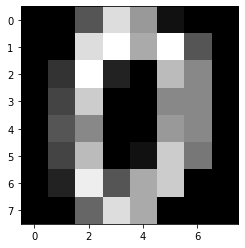

Output Label : 0


In [87]:
    plt.imshow(img_data[0],cmap = 'gray') #ใส่ cmap ลงไปเพื่อทำให้มันกลายเป็นขาวดำ
    plt.show()
    print("Output Label :",output_label[0])
#รูปนี้ใีความละเอียด 8*8 คือ 64 pixel 
#แต่ล่ะช่องจะบอกค่าความเข้ม เรียกว่า intensity

#ในแต่ล่ะpixel มีค่าตั้งแต่ 0-255
# convert to ให้อยู่ใน mode gray scale 1 ขาว , 0 ดำ

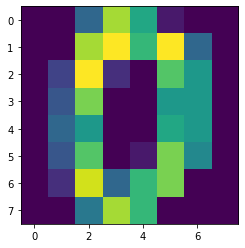

Output Label : 0


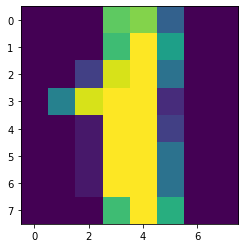

Output Label : 1


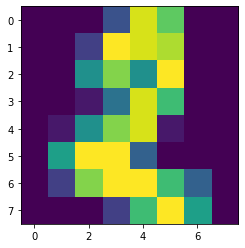

Output Label : 2


In [48]:
#Display few images with labels
#show 3 first picture 
for i in range(3):
    plt.imshow(img_data[i])
    plt.show()
    print("Output Label :",output_label[i])

In [49]:
"""
RESHAPE IMAGES(FLATTEN)
WE CAN show how the image is converted to a colomns vector.
Original Img-dim = 8x8
Result vector = 1x64
"""

'\nRESHAPE IMAGES(FLATTEN)\nWE CAN show how the image is converted to a colomns vector.\nOriginal Img-dim = 8x8\nResult vector = 1x64\n'

In [50]:
#Taking one sample image as i 
i = img_data[0]
print(i)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


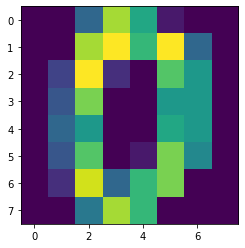

Output Label :  0


In [51]:
#Check what the image is 
plt.imshow(i)
plt.show()
print("Output Label : ",output_label[0])

In [52]:
#Vectorizing the 2-D image
i = i.reshape((64,1))

In [53]:
#Transposing the columns vector to stored in the dataset
i = i.T

In [54]:
i

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [55]:
#Showing i is same as traing_data
print("The vector i is : \n",i[0])
print("Shape of i :",i.shape)

The vector i is : 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Shape of i : (1, 64)


In [56]:
#And so now we shall use the dataset.data for future use.
training_data = dataset.data

In [60]:
print("training_data\n",training_data[0])
print("Shape : ",training_data.shape)

training_data
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Shape :  (1797, 64)


In [61]:
#Train-Test split
X_train, X_test, y_train , y_test = train_test_split(training_data,output_label) #default 20%

In [63]:
print("Total number of sample : ",len(training_data))
print("Number of training sample : ",len(X_train))
print("Number of testing sample : ",len(X_test))

Total number of sample :  1797
Number of training sample :  1347
Number of testing sample :  450


In [64]:
#Defining ous model - Multi Layer Perceptron
model = MLPClassifier(hidden_layer_sizes = (64,128,64,10),verbose=True) #(32,128,256,128,32,10)
#have hidden layer 4 and each of layer have node 64,128,64 and 10 respectively

In [65]:
#Fitting the training data to the model
model.fit(X_train,y_train)

Iteration 1, loss = 2.31186402
Iteration 2, loss = 1.84127242
Iteration 3, loss = 1.50351025
Iteration 4, loss = 1.26627541
Iteration 5, loss = 1.09963784
Iteration 6, loss = 0.96551872
Iteration 7, loss = 0.85599650
Iteration 8, loss = 0.77164600
Iteration 9, loss = 0.69183737
Iteration 10, loss = 0.61873000
Iteration 11, loss = 0.54945993
Iteration 12, loss = 0.47582866
Iteration 13, loss = 0.39733477
Iteration 14, loss = 0.32113714
Iteration 15, loss = 0.24511126
Iteration 16, loss = 0.18513997
Iteration 17, loss = 0.13238689
Iteration 18, loss = 0.10413142
Iteration 19, loss = 0.08742451
Iteration 20, loss = 0.07176219
Iteration 21, loss = 0.05991905
Iteration 22, loss = 0.05343437
Iteration 23, loss = 0.04264105
Iteration 24, loss = 0.03332800
Iteration 25, loss = 0.02730864
Iteration 26, loss = 0.02334527
Iteration 27, loss = 0.02096815
Iteration 28, loss = 0.01818898
Iteration 29, loss = 0.01597728
Iteration 30, loss = 0.01423087
Iteration 31, loss = 0.01291153
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 128, 64, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [66]:
#Making predictions with out model 
prediction = model.predict(X_test)

In [68]:
print("Prediction for X_test : \n",prediction)

Prediction for X_test : 
 [7 6 3 9 0 2 9 0 4 0 8 2 6 9 6 0 5 1 9 0 4 4 0 0 2 7 4 4 1 9 7 4 5 7 7 1 2
 7 4 7 8 0 0 2 6 4 8 0 1 7 9 5 1 3 3 2 2 3 5 3 8 3 5 3 4 3 5 0 5 4 9 9 2 2
 9 2 3 2 7 8 7 5 3 1 3 0 8 4 5 5 1 8 4 7 6 2 4 1 4 3 5 2 9 0 3 9 2 1 3 6 5
 7 3 2 9 5 3 4 1 3 0 9 1 9 3 2 5 1 2 9 0 9 2 1 7 7 7 3 1 8 3 4 0 5 1 6 6 9
 7 4 3 0 7 5 1 8 2 3 2 8 0 6 2 3 4 7 3 8 6 7 0 3 4 2 9 0 0 9 7 0 4 8 3 8 5
 1 2 7 8 5 3 6 6 8 2 8 1 2 1 8 2 7 2 6 4 5 7 2 6 8 8 5 2 8 1 4 9 3 9 8 7 7
 4 3 7 1 5 5 9 3 6 0 5 3 8 1 1 1 4 8 0 3 6 6 3 5 4 2 4 6 9 1 7 8 6 2 4 0 6
 1 9 1 4 0 8 0 5 3 0 8 0 7 5 9 6 2 3 0 0 6 3 3 8 7 6 8 6 1 2 0 1 7 2 1 3 5
 0 6 7 4 6 3 8 4 4 7 2 5 4 1 3 9 9 2 1 0 5 1 4 7 4 2 0 3 6 3 1 5 6 4 8 7 5
 2 9 1 9 3 8 1 4 2 6 6 4 4 0 0 4 8 9 5 1 6 9 8 9 7 2 2 2 1 5 6 9 3 4 1 6 3
 9 4 1 6 6 5 5 7 1 4 0 1 5 5 3 0 5 2 8 2 0 8 7 5 2 2 7 7 8 2 3 2 1 4 5 0 3
 8 7 4 5 8 5 3 7 4 8 7 3 4 5 3 4 4 1 7 9 9 9 1 0 2 8 4 6 8 5 8 1 2 2 0 9 3
 0 4 0 3 5 1]


In [71]:
print('y_test : \n',y_test)

y_test : 
 [7 6 3 9 0 2 9 0 4 0 8 2 6 9 6 0 5 1 9 0 4 4 0 0 2 7 4 4 1 9 7 4 5 7 7 1 2
 7 4 7 8 0 0 2 6 4 8 0 1 7 9 5 1 3 3 2 2 3 5 3 8 3 5 3 4 3 5 0 5 4 9 9 2 2
 9 2 3 2 7 8 7 5 3 1 3 0 8 4 5 5 8 8 4 7 6 2 4 1 4 3 5 2 9 0 2 9 2 1 3 6 5
 7 3 2 9 5 3 4 1 3 0 9 1 9 3 2 5 1 2 9 0 8 2 1 7 7 7 3 1 8 3 4 0 8 1 6 6 9
 7 4 3 0 7 5 1 8 2 3 2 8 0 8 2 3 4 7 3 8 6 7 0 3 4 2 9 0 0 9 7 0 4 8 3 8 5
 1 2 7 8 5 3 6 6 8 2 8 1 2 1 8 2 7 2 6 4 5 7 2 6 8 8 5 2 8 1 4 9 3 9 8 7 7
 4 3 7 1 5 5 9 3 6 0 5 3 2 1 8 1 4 5 0 3 6 6 3 5 4 2 4 6 9 1 7 8 6 2 4 0 6
 1 9 1 4 0 8 0 5 3 0 8 0 7 5 9 6 2 3 0 0 6 3 3 8 7 6 8 6 1 2 0 1 7 2 1 3 5
 0 6 7 4 6 3 8 4 4 7 2 5 4 1 9 9 9 2 1 0 5 1 4 7 4 2 0 3 6 3 1 5 6 4 8 7 5
 2 9 1 9 3 8 8 4 2 6 6 4 4 0 0 4 8 9 5 1 6 9 8 9 7 2 2 2 1 5 6 9 3 4 2 6 3
 9 4 1 6 6 5 5 7 8 4 0 1 5 5 3 0 9 2 8 2 0 8 7 5 2 2 7 7 8 2 3 2 1 4 5 0 2
 8 7 4 5 8 5 3 7 4 8 7 3 4 5 3 4 4 1 7 9 9 9 1 0 2 8 4 6 8 5 8 1 2 2 0 9 3
 0 4 0 3 6 1]


In [74]:
list(zip(y_test,prediction))

[(7, 7),
 (6, 6),
 (3, 3),
 (9, 9),
 (0, 0),
 (2, 2),
 (9, 9),
 (0, 0),
 (4, 4),
 (0, 0),
 (8, 8),
 (2, 2),
 (6, 6),
 (9, 9),
 (6, 6),
 (0, 0),
 (5, 5),
 (1, 1),
 (9, 9),
 (0, 0),
 (4, 4),
 (4, 4),
 (0, 0),
 (0, 0),
 (2, 2),
 (7, 7),
 (4, 4),
 (4, 4),
 (1, 1),
 (9, 9),
 (7, 7),
 (4, 4),
 (5, 5),
 (7, 7),
 (7, 7),
 (1, 1),
 (2, 2),
 (7, 7),
 (4, 4),
 (7, 7),
 (8, 8),
 (0, 0),
 (0, 0),
 (2, 2),
 (6, 6),
 (4, 4),
 (8, 8),
 (0, 0),
 (1, 1),
 (7, 7),
 (9, 9),
 (5, 5),
 (1, 1),
 (3, 3),
 (3, 3),
 (2, 2),
 (2, 2),
 (3, 3),
 (5, 5),
 (3, 3),
 (8, 8),
 (3, 3),
 (5, 5),
 (3, 3),
 (4, 4),
 (3, 3),
 (5, 5),
 (0, 0),
 (5, 5),
 (4, 4),
 (9, 9),
 (9, 9),
 (2, 2),
 (2, 2),
 (9, 9),
 (2, 2),
 (3, 3),
 (2, 2),
 (7, 7),
 (8, 8),
 (7, 7),
 (5, 5),
 (3, 3),
 (1, 1),
 (3, 3),
 (0, 0),
 (8, 8),
 (4, 4),
 (5, 5),
 (5, 5),
 (8, 1),
 (8, 8),
 (4, 4),
 (7, 7),
 (6, 6),
 (2, 2),
 (4, 4),
 (1, 1),
 (4, 4),
 (3, 3),
 (5, 5),
 (2, 2),
 (9, 9),
 (0, 0),
 (2, 3),
 (9, 9),
 (2, 2),
 (1, 1),
 (3, 3),
 (6, 6),
 (5, 5),
 

In [82]:
#Evaluation model performance
ctr = 0
score = 0
scoref = 0
misclassified=[]
for i,j in zip(y_test,prediction):
    if i==j:
        score +=1
    else:
        misclassified.append((X_test[ctr],y_test[ctr],prediction[ctr]))#Logging misclassifief data
        print("Misclassified at ctr=",ctr,"Predicted to be : ",prediction[ctr],"True Label : ",y_test[ctr])
        scoref +=1
    ctr+=1

print("Final Score :",score,'/',len(y_test))
print("Number of misclassification :",len(misclassified)) #print("Number of misclassification :",scoref)

Misclassified at ctr= 90 Predicted to be :  1 True Label :  8
Misclassified at ctr= 104 Predicted to be :  3 True Label :  2
Misclassified at ctr= 131 Predicted to be :  9 True Label :  8
Misclassified at ctr= 143 Predicted to be :  5 True Label :  8
Misclassified at ctr= 161 Predicted to be :  6 True Label :  8
Misclassified at ctr= 234 Predicted to be :  8 True Label :  2
Misclassified at ctr= 236 Predicted to be :  1 True Label :  8
Misclassified at ctr= 239 Predicted to be :  8 True Label :  5
Misclassified at ctr= 310 Predicted to be :  3 True Label :  9
Misclassified at ctr= 339 Predicted to be :  1 True Label :  8
Misclassified at ctr= 367 Predicted to be :  1 True Label :  2
Misclassified at ctr= 378 Predicted to be :  1 True Label :  8
Misclassified at ctr= 386 Predicted to be :  5 True Label :  9
Misclassified at ctr= 406 Predicted to be :  3 True Label :  2
Misclassified at ctr= 448 Predicted to be :  5 True Label :  6
Final Score : 435 / 450
Number of misclassification : 15

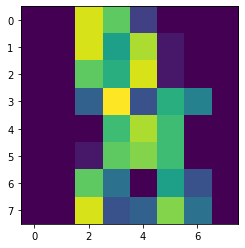

Expected class : 8
Predicted class : 1


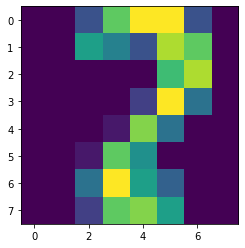

Expected class : 2
Predicted class : 3


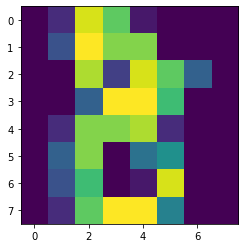

Expected class : 8
Predicted class : 9


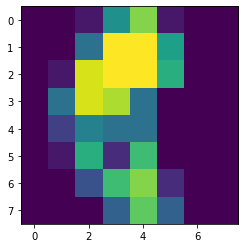

Expected class : 8
Predicted class : 5


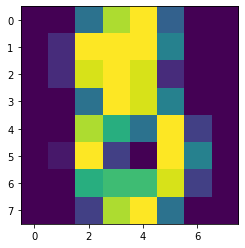

Expected class : 8
Predicted class : 6


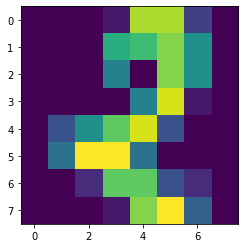

Expected class : 2
Predicted class : 8


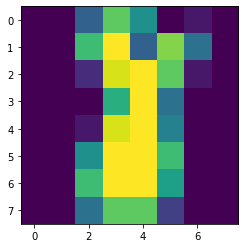

Expected class : 8
Predicted class : 1


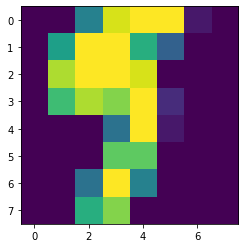

Expected class : 5
Predicted class : 8


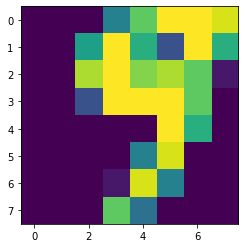

Expected class : 9
Predicted class : 3


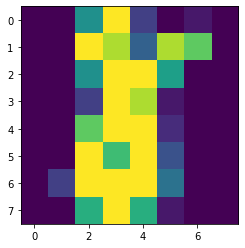

Expected class : 8
Predicted class : 1


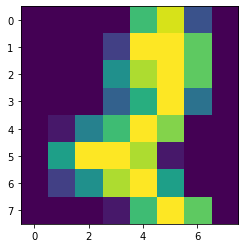

Expected class : 2
Predicted class : 1


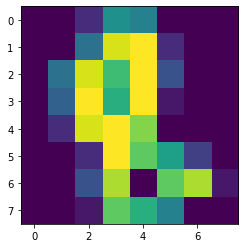

Expected class : 8
Predicted class : 1


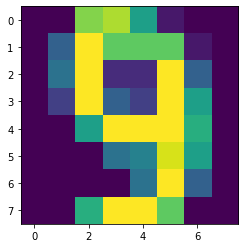

Expected class : 9
Predicted class : 5


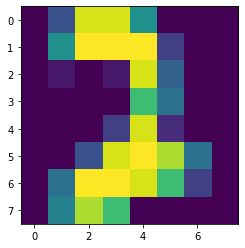

Expected class : 2
Predicted class : 3


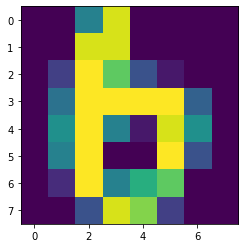

Expected class : 6
Predicted class : 5


In [84]:
#Looking at our misclassification 
for data in misclassified:
    plt.imshow(data[0].reshape(8,8))
    plt.show()
    print("Expected class :",data[1]) #data[1] is y_test
    print("Predicted class :",data[2]) #dtat[2] is pictiction

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
print('Confusion Matrix: \n',confusion_matrix(y_test,prediction))

Confusion Matrix: 
 [[45  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  1 51  2  0  0  0  0  1  0]
 [ 0  0  0 50  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 42  0  0  1  0]
 [ 0  0  0  0  0  1 35  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  0]
 [ 0  4  0  0  0  1  1  0 40  1]
 [ 0  0  0  1  0  1  0  0  0 37]]


In [91]:
print('Model Score Index: \n',classification_report(y_test,prediction))

Model Score Index: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.89      1.00      0.94        42
           2       1.00      0.93      0.96        55
           3       0.94      1.00      0.97        50
           4       1.00      1.00      1.00        50
           5       0.93      0.98      0.95        43
           6       0.97      0.97      0.97        36
           7       1.00      1.00      1.00        43
           8       0.95      0.85      0.90        47
           9       0.97      0.95      0.96        39

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

